#Per ottenere i vettori del vocabolario
https://github.com/vijayaiitk/NLP-text-classification-model/issues/1

Prendi le parole più simili
https://aneesha.medium.com/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229
https://stackoverflow.com/questions/37818426/get-most-similar-words-given-the-vector-of-the-word-not-the-word-itself
https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html

In [22]:
# usare i lessici

In [1]:
import pandas as pd
import nltk
import numpy as np
import string

import gensim
from sklearn.pipeline import Pipeline
from preprocessing import *
from numpy import array 
from numpy import dot
from numpy.linalg import norm

In [2]:
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases

In [3]:
from nltk import sent_tokenize
from nltk import pos_tag
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import wordnet
import re

In [6]:
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.DEBUG)

In [4]:
dataset = pd.read_csv("amazon_alexa.tsv", sep = "\t")
dataset.tail()

rating       date   variation  \
3145       5  30-Jul-18  Black  Dot   
3146       5  30-Jul-18  Black  Dot   
3147       5  30-Jul-18  Black  Dot   
3148       5  30-Jul-18  White  Dot   
3149       4  29-Jul-18  Black  Dot   

                                       verified_reviews  feedback  
3145  Perfect for kids, adults and everyone in betwe...         1  
3146  Listening to music, searching locations, check...         1  
3147  I do love these things, i have them running my...         1  
3148  Only complaint I have is that the sound qualit...         1  
3149                                               Good         1

In [5]:
dataset.drop(dataset[dataset.rating == 3].index, inplace=True) 

In [18]:
dataset = drop_positive_duplicates(dataset)

In [228]:
# dataset = undersample_positive(dataset)

In [19]:
sentences = []

for review in dataset["verified_reviews"]:
    sents = sent_tokenize(review)
    for sent in sents:
        sentences.append(sent)
sentences

["It's like Siri, in fact, Siri answers more accurately then Alexa.",
 "I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!?",
 'Really fun when it was working?',
 'Sad joke.',
 'Worthless.',
 'Really disappointed Alexa has to be plug-in to wall socket all the time.',
 'My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.',
 'If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.',
 "It's got great sound and bass but it doesn't work all of the time.",
 'Its still hot or miss when it recognizes things',
 'I am not super impressed with Alexa.',
 "When my Prime lapsed, she wouldn't play anything.",
 "She isn't smart enough to differentiate among spotify 

In [20]:
new_text, new_sent_tok = tokenize_list_of_text(dataset["verified_reviews"], custom_stopwords, False, pos_list)
# contengono una lista di tutte le frasi pre processate, nella prima variabile in stringa, nella seconda in tokens 

total number of types extracted is: 3174


In [21]:
bigrams = Phrases(new_sent_tok)
bigrams[new_sent_tok][34]

['two',
 'week',
 'set',
 'longer',
 'work',
 'connection',
 'light',
 'sound',
 'guess',
 'sell_refurbished']

In [22]:
#window = numero di token, min_num = frequenza minima dei token, sg = traing algorithm - skip-gram, negative = negative example
#aggiorna soltato un numero k di pesi nella rete per le parole più informative 

# w2v_model = Word2Vec(bigrams[new_sent_tok], vector_size=100, window = 3, min_count = 5, sg=1, epochs=15, hs = 1)
# 100, 3, 5, skipgram

w2v_model = Word2Vec(bigrams[new_sent_tok], vector_size=300, window = 5, min_count = 5, sg=1, hs = 1, alpha=0.03, min_alpha=0.0007)
w2v_model.train(bigrams[new_sent_tok], total_examples=len(bigrams[new_sent_tok]), epochs=100, report_delay=1)
# w2v_model = Word2Vec(new_sent_tok, vector_size=100, window = 2, min_count = 5, sg=0, epochs=20, hs = 1)

(2067066, 2995000)

In [23]:
len(w2v_model.wv.vectors)

991

In [24]:
w2v_model.wv.most_similar(['love'], topn = 2000) #Nearest neighboor --> high cosine similarity

[('watch_movie', 0.24499744176864624),
 ('great', 0.23509220778942108),
 ('law', 0.22167935967445374),
 ('fit', 0.2071717530488968),
 ('outstanding', 0.18853552639484406),
 ('pleased', 0.17377041280269623),
 ('trailer', 0.1709064543247223),
 ('audible', 0.16881465911865234),
 ('work_advertised', 0.16807374358177185),
 ('ease_use', 0.1656123548746109),
 ('daughter', 0.16515617072582245),
 ('much', 0.1644713282585144),
 ('around_house', 0.1600690335035324),
 ('get', 0.1595885306596756),
 ('rock', 0.15916958451271057),
 ('sing', 0.15911155939102173),
 ('fairly', 0.15903733670711517),
 ('definitely_worth', 0.157825767993927),
 ('everyday', 0.15641216933727264),
 ('kitchen', 0.15548880398273468),
 ('favorite_song', 0.1547858566045761),
 ('mother', 0.15465803444385529),
 ('gift', 0.15405479073524475),
 ('ease', 0.15364423394203186),
 ('member', 0.15276899933815002),
 ('voice_control', 0.15181075036525726),
 ('worth_every', 0.15114355087280273),
 ('blast', 0.1503894031047821),
 ('everything',

In [25]:
w2v_model.wv.most_similar(['love'], topn = len(w2v_model.wv.vectors))[-20:] # less similar words

[('unit', -0.025053013116121292),
 ('improve', -0.02508106455206871),
 ('full', -0.02546902745962143),
 ('disconnect', -0.0256614051759243),
 ('salsa', -0.025988079607486725),
 ('equipment', -0.026209143921732903),
 ('tech_support', -0.02694239281117916),
 ('lastly', -0.027239354327321053),
 ('record', -0.027856195345520973),
 ('attempt', -0.028765322640538216),
 ('understand', -0.02909769117832184),
 ('setting', -0.030253272503614426),
 ('adapter', -0.03068159706890583),
 ('fill', -0.03282654657959938),
 ('experience', -0.03283604234457016),
 ('worthlessness', -0.03738033026456833),
 ('follow', -0.037749867886304855),
 ('force', -0.03991095349192619),
 ('cycle', -0.04259178042411804),
 ('expensive', -0.06740570068359375)]

In [26]:
w2v_model.wv.vectors[0] # contiene i vettori

array([ 0.12958339,  0.01691894,  0.22004165,  0.02882595, -0.03297688,
       -0.30418622, -0.02695327, -0.04542128, -0.09928226, -0.03476422,
        0.16168946, -0.10253298, -0.08575781, -0.00702126, -0.13055077,
       -0.04276093,  0.02955963, -0.0881771 , -0.01590881,  0.00749704,
       -0.18050103, -0.04198955,  0.3257669 ,  0.13247487, -0.05000874,
       -0.09225605,  0.2913842 ,  0.05213263, -0.02962749, -0.00578563,
       -0.14379862, -0.11923134, -0.01241602, -0.05428001, -0.03859079,
       -0.11783017,  0.00478041, -0.19923432,  0.02544402,  0.06644408,
       -0.02811923, -0.09638251,  0.1862466 ,  0.07350814,  0.1856424 ,
        0.01899474, -0.09213986, -0.15582678,  0.19495071,  0.2014313 ,
       -0.25235787,  0.04809229, -0.03699731,  0.18216547,  0.1388468 ,
        0.18236181, -0.02830536,  0.01468949, -0.03506975, -0.00995425,
        0.05120459, -0.20979777, -0.07740813, -0.11201623, -0.03104698,
        0.05295491,  0.00351927, -0.02539865,  0.05228864,  0.14

The structure is called “KeyedVectors” and is essentially a mapping between keys and vectors. Each vector is identified by its lookup key, most often a short string token, so this is usually a mapping between {str => 1D numpy array}
https://radimrehurek.com/gensim/models/keyedvectors.html

Other useful internals in Gensim 4.0+ include model.wv.index_to_key, a plain list of the key (word) in each index position, and model.wv.key_to_index, a plain dict mapping keys (words) to their index positions.

In [27]:
w2v_model.wv.key_to_index

{'love': 0,
 'use': 1,
 'great': 2,
 'work': 3,
 'get': 4,
 'like': 5,
 'device': 6,
 'one': 7,
 'good': 8,
 'buy': 9,
 'product': 10,
 'sound': 11,
 'music': 12,
 'thing': 13,
 'would': 14,
 'time': 15,
 'not': 16,
 'show': 17,
 'speaker': 18,
 'set': 19,
 'day': 20,
 'new': 21,
 'want': 22,
 'really': 23,
 'also': 24,
 'make': 25,
 'much': 26,
 'easy': 27,
 'need': 28,
 'purchase': 29,
 'screen': 30,
 'say': 31,
 'far': 32,
 'plus': 33,
 'home': 34,
 'ask': 35,
 'try': 36,
 "n't": 37,
 'connect': 38,
 'well': 39,
 'still': 40,
 'spot': 41,
 'think': 42,
 'play': 43,
 'play_music': 44,
 'tell': 45,
 'little': 46,
 'could': 47,
 'everything': 48,
 'light': 49,
 'fun': 50,
 'even': 51,
 'feature': 52,
 'see': 53,
 'smart': 54,
 'room': 55,
 'easy_set': 56,
 'way': 57,
 'price': 58,
 'turn': 59,
 'problem': 60,
 'nice': 61,
 'give': 62,
 'able': 63,
 'item': 64,
 'look': 65,
 'find': 66,
 'come': 67,
 'many': 68,
 'app': 69,
 'alarm': 70,
 'first': 71,
 'house': 72,
 'add': 73,
 'two': 7

In [28]:
w2v = dict(zip(w2v_model.wv.index_to_key, w2v_model.wv.vectors))
w2v

{'love': array([ 0.12958339,  0.01691894,  0.22004165,  0.02882595, -0.03297688,
        -0.30418622, -0.02695327, -0.04542128, -0.09928226, -0.03476422,
         0.16168946, -0.10253298, -0.08575781, -0.00702126, -0.13055077,
        -0.04276093,  0.02955963, -0.0881771 , -0.01590881,  0.00749704,
        -0.18050103, -0.04198955,  0.3257669 ,  0.13247487, -0.05000874,
        -0.09225605,  0.2913842 ,  0.05213263, -0.02962749, -0.00578563,
        -0.14379862, -0.11923134, -0.01241602, -0.05428001, -0.03859079,
        -0.11783017,  0.00478041, -0.19923432,  0.02544402,  0.06644408,
        -0.02811923, -0.09638251,  0.1862466 ,  0.07350814,  0.1856424 ,
         0.01899474, -0.09213986, -0.15582678,  0.19495071,  0.2014313 ,
        -0.25235787,  0.04809229, -0.03699731,  0.18216547,  0.1388468 ,
         0.18236181, -0.02830536,  0.01468949, -0.03506975, -0.00995425,
         0.05120459, -0.20979777, -0.07740813, -0.11201623, -0.03104698,
         0.05295491,  0.00351927, -0.025398

In [29]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
#from plotnine import *
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics.pairwise import cosine_similarity

from kneed import KneeLocator

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer


#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

In [30]:
vectors=w2v_model.wv.vectors
len(vectors)

991

In [31]:
words = w2v_model.wv.index_to_key
len(words)

991

In [32]:
sse_list = []
silhouette_list = []
for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(vectors)
    sse_list.append(kmeans.inertia_)
    silhouette_list.append(silhouette_score(vectors,kmeans.labels_))

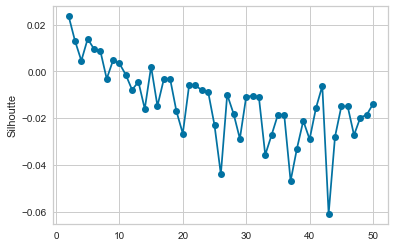

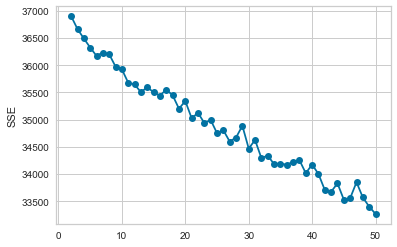

In [33]:
plt.plot(range(2, len(silhouette_list)+2), silhouette_list, marker='o')
plt.ylabel('Silhoutte')
plt.show()
plt.plot(range(2, len(sse_list)+2), sse_list, marker='o')
plt.ylabel('SSE')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300)
kmeans.fit(vectors)

KMeans(n_clusters=2)

In [35]:
centers=kmeans.cluster_centers_ # centroidi
labels=kmeans.labels_ # clusters labels
np.unique(labels, return_counts=True) 

(array([0, 1]), array([399, 592], dtype=int64))

In [36]:
len(centers)

2

In [37]:
for i in centers:
    print(w2v_model.wv.most_similar(i, topn=40))
    print("####################################################")

[('rock', 0.4703109860420227), ('motown', 0.4508739113807678), ('salsa', 0.4344169497489929), ('general', 0.4248671531677246), ('spam', 0.4216025471687317), ('lyric_song', 0.4184327721595764), ('rid', 0.41130417585372925), ('trailer', 0.4020233750343323), ('shopping_list', 0.39608195424079895), ('spanish', 0.3912975490093231), ('hardly', 0.3897417485713959), ('fit', 0.383071631193161), ('cancel', 0.3816208243370056), ('throughout_house', 0.37960121035575867), ('favorite_song', 0.379564106464386), ('every_morning', 0.3783985376358032), ('school', 0.3761436641216278), ('worthless', 0.37554246187210083), ('lighting', 0.37547650933265686), ('penny', 0.3745085597038269), ('automation', 0.37381064891815186), ('remind', 0.37374815344810486), ('......', 0.3726179301738739), ('appointment', 0.3724670112133026), ('course', 0.3720705807209015), ('grocery_list', 0.3681090474128723), ('added', 0.3670549690723419), ('surprisingly', 0.36638548970222473), ('shopping', 0.36506912112236023), ('audible',

In [38]:
df = pd.DataFrame()

In [39]:
print(len(w2v["love"]))
print(len(centers[0])) # to check if the vectors have the same length

300
300


In [40]:
words = []
labels = []
cos = []
for w, label in zip(w2v, kmeans.labels_):
    words.append(w)
    labels.append(label)
    # this calculates the similarity bewtween centroids and all the words in their clusters
    cos_sim = dot(w2v[w], centers[label])/(norm(w2v[w])*norm(centers[label])) # cosine similarity formula (dot(a, b)/norm(a)*norm(b))
    cos.append(cos_sim)
    
df["word"] = words
df["labels"] = labels
df["cos"] = cos

print(df[df["labels"] == 1].sort_values(by = "cos", ascending = False).to_markdown()) # shows the most similar words to that cluster

|     | word                |   labels |      cos |
|----:|:--------------------|---------:|---------:|
| 807 | spanish             |        1 | 0.438465 |
| 805 | dont_know           |        1 | 0.428858 |
| 847 | alexi               |        1 | 0.423608 |
| 952 | assume              |        1 | 0.417447 |
| 863 | auxiliary_jack      |        1 | 0.409671 |
| 939 | false               |        1 | 0.407826 |
| 604 | customer_service    |        1 | 0.40473  |
| 973 | cancel              |        1 | 0.40372  |
| 990 | charm               |        1 | 0.403388 |
| 928 | lastly              |        1 | 0.396853 |
| 890 | nobody              |        1 | 0.39327  |
| 960 | menu                |        1 | 0.392167 |
| 779 | shipping            |        1 | 0.390056 |
| 836 | homescreen          |        1 | 0.388591 |
| 800 | certify_refurbish   |        1 | 0.385856 |
| 846 | interference        |        1 | 0.383797 |
| 845 | cozi                |        1 | 0.382192 |
| 842 | flaw

In [41]:
from sklearn.manifold import TSNE

In [42]:
tsne = TSNE(3, learning_rate="auto", metric="cosine")
tokens_list = []
for vec in w2v_model.wv.vectors:
    tokens_list.append(vec)

In [43]:
new_val = tsne.fit_transform(np.array(tokens_list))

c:\Users\crist\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [44]:
df["x"] = [x[0] for x in new_val]
df["y"] = [x[1] for x in new_val]
df["z"] = [x[2] for x in new_val]

In [45]:
print(df[df["labels"] == 1].sort_values(by = "cos", ascending = False).to_markdown())

|     | word                |   labels |      cos |          x |           y |           z |
|----:|:--------------------|---------:|---------:|-----------:|------------:|------------:|
| 807 | spanish             |        1 | 0.438465 |  37.5333   |   2.55135   |   5.98062   |
| 805 | dont_know           |        1 | 0.428858 | -11.5032   |  27.8996    |  23.1459    |
| 847 | alexi               |        1 | 0.423608 |  -2.07964  |  19.3759    |  21.9075    |
| 952 | assume              |        1 | 0.417447 |   0.44475  |  -8.72225   |  14.5784    |
| 863 | auxiliary_jack      |        1 | 0.409671 |  12.5086   |  10.0483    | -16.78      |
| 939 | false               |        1 | 0.407826 |  11.1491   |  15.3049    |  32.437     |
| 604 | customer_service    |        1 | 0.40473  |   2.22071  |  -1.48083   |  -5.25126   |
| 973 | cancel              |        1 | 0.40372  |  20.963    | -22.0348    |   7.07021   |
| 990 | charm               |        1 | 0.403388 | -25.9081   |   1.8

In [46]:
import seaborn as sns

<AxesSubplot:xlabel='x', ylabel='y'>

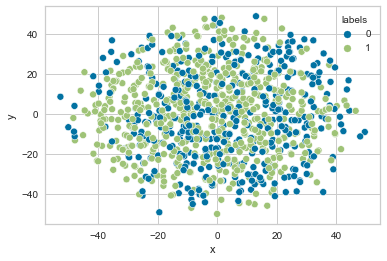

In [47]:
sns.scatterplot(data = df, x = "x", y = "y", hue = "labels")

In [37]:
import plotly_express as px

In [48]:
px.scatter_3d(data_frame = df, x = "x", y = "y", z = "z", color = [str(x) for x in df["labels"]], hover_name = "word")

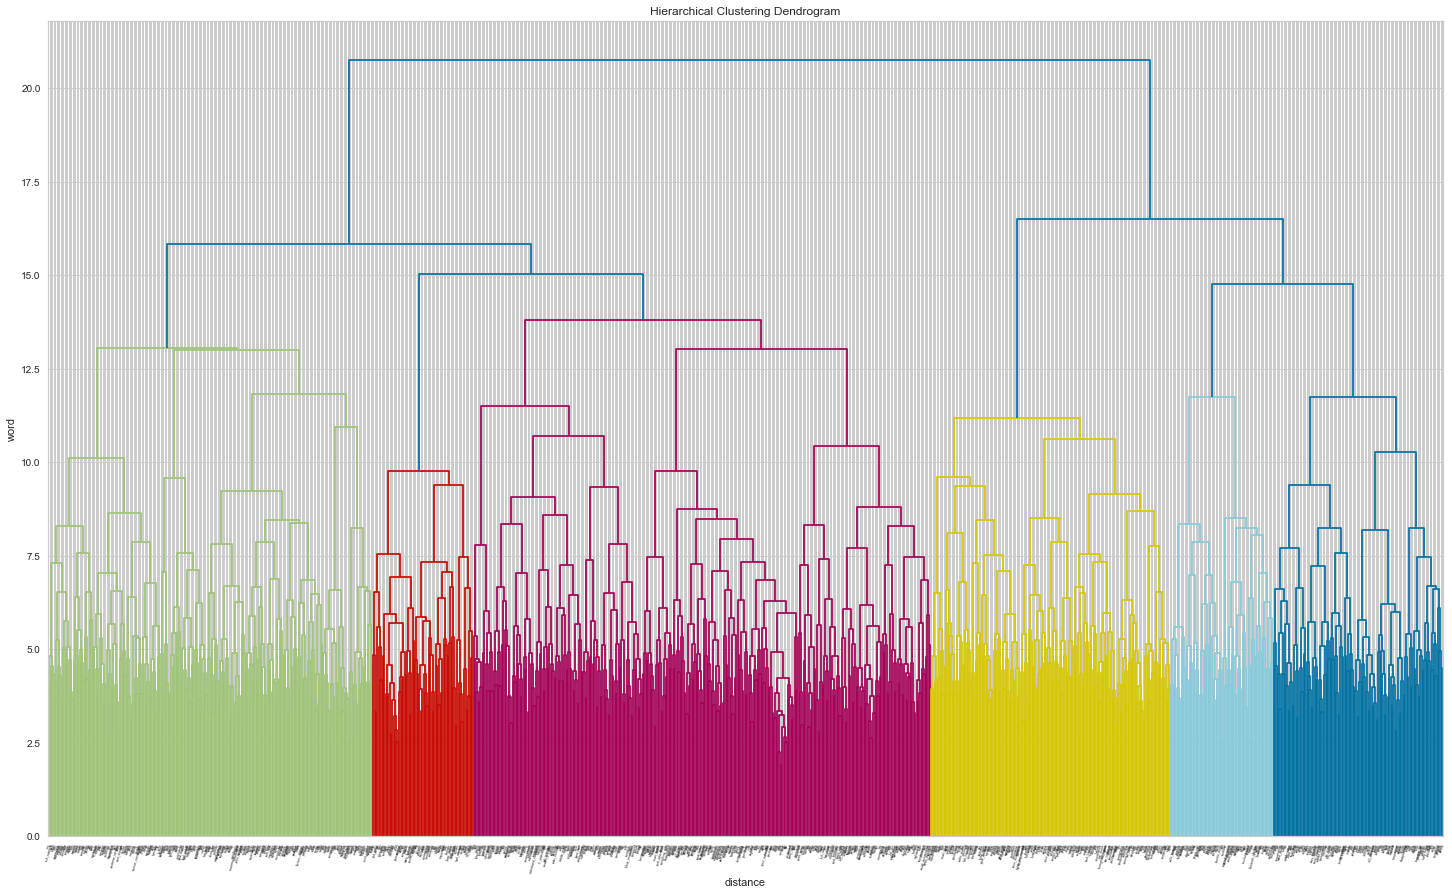

In [39]:
# distance_matrix = pairwise_distances(vectors, vectors, metric = "cosine")
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

l = linkage(w2v_model.wv.vectors, method='ward', metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=75.,  # rotates the x axis labels
    leaf_font_size=3.,  # font size for the x axis labels
    leaf_label_func=lambda v: str(w2v_model.wv.index_to_key[v])
)
plt.show()

In [40]:
hier_df = pd.DataFrame()

hier_labels = fcluster(l, 2, "maxclust")
hier_df["labels"] = hier_labels

hier_df["x"] = df["x"]
hier_df["y"] = df["y"]
hier_df["z"] = df["z"]
hier_df["word"] = df["word"]
print(hier_df[hier_df["labels"] == 4].to_markdown())

| labels   | x   | y   | z   | word   |
|----------|-----|-----|-----|--------|


In [41]:
px.scatter_3d(data_frame = hier_df, x = "x", y = "y", z = "z", color = [str(x) for x in hier_df["labels"]], hover_name = "word")

In [42]:
w2v_model.wv.most_similar(['love'], topn = 2000) #Nearest neighboor --> high cosine similarity

[('great', 0.5743112564086914),
 ('like', 0.5253594517707825),
 ('grand', 0.48562249541282654),
 ('homework', 0.44984281063079834),
 ('watching', 0.4462510347366333),
 ('outstanding', 0.4440355896949768),
 ('lyric_song', 0.4435833692550659),
 ('see_lyric', 0.4343516528606415),
 ('really_enjoy', 0.4329974949359894),
 ('daughter', 0.4291297495365143),
 ('fun', 0.41914623975753784),
 ('joke', 0.41291409730911255),
 ('mother', 0.4125719964504242),
 ('every_room', 0.39840105175971985),
 ('dad', 0.39768269658088684),
 ('highly_recommend', 0.39722713828086853),
 ('neat', 0.396049827337265),
 ('advertised', 0.3953924775123596),
 ('seriously', 0.3950595557689667),
 ('mom', 0.3941199481487274),
 ('ton', 0.39228349924087524),
 ('one', 0.39131462574005127),
 ('everything', 0.38897013664245605),
 ('instantly', 0.3879947066307068),
 ('absolutely_love', 0.38571956753730774),
 ('kid', 0.3853985369205475),
 ('recipe', 0.38440385460853577),
 ('lyric', 0.3841017484664917),
 ('everyday', 0.379946798086166

In [49]:
# THIS CALCULATES DISTANCES BEWTWEEN EACH WORD AND THE POSITIVE-NEGATIVE CENTROID

df_polarity = pd.DataFrame()

words = []
positive_centroid = "love"
negative_centroid = "issue"
positive = []
negative = []

for w in w2v:
    words.append(w)
    pos = dot(w2v[w], w2v[positive_centroid])/(norm(w2v[w])*norm(w2v[positive_centroid]))
    neg = dot(w2v[w], w2v[negative_centroid])/(norm(w2v[w])*norm(w2v[negative_centroid]))
    # neg = 1-pos
    positive.append(pos)
    negative.append(neg)

df_polarity["word"] = words
df_polarity["pos_score"] = positive
df_polarity["neg_score"] = negative

df_polarity.sort_values(by = "neg_score", ascending = False).head(15)

word  pos_score  neg_score
88               issue   0.015652   1.000000
727                saw   0.056669   0.267739
989              total   0.089018   0.232989
342            overall  -0.002076   0.211435
813       occasionally   0.127469   0.208007
238           internet   0.051615   0.206200
292             couple   0.038033   0.199703
932               kick   0.051052   0.199511
847              alexi   0.059303   0.196520
876               buck   0.051599   0.194832
499               save   0.088527   0.191947
501          correctly   0.071312   0.190443
810  voice_recognition   0.054074   0.188078
657         every_room   0.084909   0.183735
685               past   0.048745   0.183554

In [50]:
w2v_model.wv.most_similar(['love'], topn = 2000)[-20:] #Nearest neighboor --> high cosine similarity

[('unit', -0.025053013116121292),
 ('improve', -0.02508106455206871),
 ('full', -0.02546902745962143),
 ('disconnect', -0.0256614051759243),
 ('salsa', -0.025988079607486725),
 ('equipment', -0.026209143921732903),
 ('tech_support', -0.02694239281117916),
 ('lastly', -0.027239354327321053),
 ('record', -0.027856195345520973),
 ('attempt', -0.028765322640538216),
 ('understand', -0.02909769117832184),
 ('setting', -0.030253272503614426),
 ('adapter', -0.03068159706890583),
 ('fill', -0.03282654657959938),
 ('experience', -0.03283604234457016),
 ('worthlessness', -0.03738033026456833),
 ('follow', -0.037749867886304855),
 ('force', -0.03991095349192619),
 ('cycle', -0.04259178042411804),
 ('expensive', -0.06740570068359375)]

In [51]:
def scoring_function(x, pos_w, neg_w, w2v):
    bigrams_clean = Phrases(x)
    # print(clean)
    predicted = []
    i = 0
    for review in bigrams_clean[x]:
        score = 0
        for w in review:
            try:
                vec = w2v[w]
                pos = dot(vec, w2v[pos_w])/(norm(vec)*norm(w2v[pos_w]))
                neg = dot(vec, w2v[neg_w])/(norm(vec)*norm(w2v[neg_w]))
                score += pos
                score -= neg
            except KeyError:
                continue
        if score > 0:
            predicted.append(1)
        elif score < 0:
            predicted.append(0)
        else:
            predicted.append(0)
        i+=1

    return predicted

In [52]:
def scoring_functionV3(x, pos_list, neg_list, w2v, stampa = True):
    import statistics
    bigrams_clean = Phrases(x)
    # print(clean)
    predicted = []
    for review in bigrams_clean[x]:
        pos_score = 0
        neg_score = 0
        for w in review:
            pos_sim_list = []
            neg_sim_list = []
            try:
                vec = w2v[w]
            except KeyError:
                continue
            for w_pos, w_neg in zip(pos_list, neg_list):
                pos_sim = dot(vec, w2v[w_pos])/(norm(vec)*norm(w2v[w_pos]))
                neg_sim = dot(vec, w2v[w_neg])/(norm(vec)*norm(w2v[w_neg]))  
                pos_sim_list.append(pos_sim) 
                neg_sim_list.append(neg_sim)
            pos = statistics.mean(pos_sim_list)
            neg = statistics.mean(neg_sim_list)
            if stampa:
                print(w, "pos:", pos, "neg:", neg)
            pos_score += statistics.mean(pos_sim_list)
            neg_score += statistics.mean(neg_sim_list)

        if pos_score>neg_score:
            predicted.append(1)
        elif pos_score<neg_score:
            predicted.append(0)
        else:
            predicted.append(0)
    
    return predicted

In [53]:
target_pos = ["love", "enjoy", "work_perfectly", "great"]
target_neg = ["trouble", "reset", "fix", "terrible", "disappointed", "issue"]
# target_pos = ["love", "enjoy", "great"]
# target_neg = ["reset", "fix", "terrible", "disappointed"]

import statistics

df_score_v3 = pd.DataFrame()

words = []
pos_score = []
neg_score = []

for w, vec in w2v.items():
    pos_sim_list = []
    neg_sim_list = []
    for w_pos, w_neg in zip(target_pos, target_neg):
        pos_sim = dot(vec, w2v[w_pos])/(norm(vec)*norm(w2v[w_pos]))
        neg_sim = dot(vec, w2v[w_neg])/(norm(vec)*norm(w2v[w_neg]))  
        pos_sim_list.append(pos_sim) 
        neg_sim_list.append(neg_sim)
    pos = statistics.mean(pos_sim_list)
    neg = statistics.mean(neg_sim_list)
    words.append(w)
    pos_score.append(pos_sim)
    neg_score.append(neg_sim)

df_score_v3["words"] = words
df_score_v3["pos"] = pos_score
df_score_v3["neg"] = neg_score

df_score_v3.sort_values(by = "neg", ascending = False).head(15)

words       pos       neg
493    terrible  0.096351  1.000000
948     massive  0.114568  0.461169
710    negative  0.066361  0.379308
955     forward  0.097431  0.324333
251        fine  0.041209  0.312271
442    intercom -0.020482  0.310894
839  save_money  0.050982  0.274184
598   satisfied  0.195285  0.271401
259  difference  0.111208  0.266046
705    complain  0.091022  0.262178
760       reach -0.021471  0.261557
772      accent  0.096855  0.259617
621    language  0.049794  0.258475
950     drop-in  0.042793  0.257452
128         big  0.018413  0.251892

In [54]:
w2v_model.wv.most_similar(['love'], topn = 2000) #Nearest neighboor --> high cosine similarity

[('watch_movie', 0.24499744176864624),
 ('great', 0.23509220778942108),
 ('law', 0.22167935967445374),
 ('fit', 0.2071717530488968),
 ('outstanding', 0.18853552639484406),
 ('pleased', 0.17377041280269623),
 ('trailer', 0.1709064543247223),
 ('audible', 0.16881465911865234),
 ('work_advertised', 0.16807374358177185),
 ('ease_use', 0.1656123548746109),
 ('daughter', 0.16515617072582245),
 ('much', 0.1644713282585144),
 ('around_house', 0.1600690335035324),
 ('get', 0.1595885306596756),
 ('rock', 0.15916958451271057),
 ('sing', 0.15911155939102173),
 ('fairly', 0.15903733670711517),
 ('definitely_worth', 0.157825767993927),
 ('everyday', 0.15641216933727264),
 ('kitchen', 0.15548880398273468),
 ('favorite_song', 0.1547858566045761),
 ('mother', 0.15465803444385529),
 ('gift', 0.15405479073524475),
 ('ease', 0.15364423394203186),
 ('member', 0.15276899933815002),
 ('voice_control', 0.15181075036525726),
 ('worth_every', 0.15114355087280273),
 ('blast', 0.1503894031047821),
 ('everything',

In [55]:
def scoring_functionV4(x, pos_list, neg_list, w2v, stampa = True):
    import statistics
    bigrams_clean = Phrases(x)
    # print(clean)
    predicted = []
    average_pos = np.copy(w2v_model.wv.get_vector(pos_list[0]))
    average_neg = np.copy(w2v_model.wv.get_vector(neg_list[0]))
    for w_pos, w_neg in zip(pos_list[1:], neg_list[1:]):
            average_pos += w2v_model.wv.get_vector(w_pos)
            average_neg += w2v_model.wv.get_vector(w_neg)
    
    # average_pos = average_pos/norm(average_pos)
    # average_neg = average_neg/norm(average_neg)

    for review in bigrams_clean[x]:
        pos_score = 0
        neg_score = 0
        for w in review:
            try:
                vec = w2v[w]
            except KeyError:
                continue

            pos = dot(vec, average_pos)/(norm(vec)*norm(average_pos))
            neg = dot(vec, average_neg)/(norm(vec)*norm(average_neg))


            if stampa:
                print(w, "pos:", pos, "neg:", neg)
            pos_score += pos
            neg_score += neg

        if pos_score>neg_score:
            predicted.append(1)
        elif pos_score<neg_score:
            predicted.append(0)
        else:
            predicted.append(0)
    
    return predicted

In [56]:
y = []
x = []

dataset.drop(dataset[dataset.rating == 3].index, inplace=True) #droppa recensioni con 3-4 stelle
dataset.drop(dataset[dataset.rating == 4].index, inplace=True)
# dataset_test = create_balanced_dataset(dataset)
for feedback, review in zip(dataset["feedback"], dataset["verified_reviews"]):
    y.append(feedback)
    x.append(review)
    
x_test = tokenize_list_of_text(x, custom_stopwords, False, pos_list)[1]

total number of types extracted is: 2768


In [57]:
target_pos = ["love", "enjoy", "work_perfectly", "great", "awesome", "cool"]
target_neg = ["trouble", "reset", "fix", "error", "disappointed", "hate"]
predicted = scoring_function(x_test, "love", "trouble", w2v.copy())
print(classification_report(y, predicted))
predicted = scoring_functionV3(x_test, target_pos, target_neg, w2v.copy(), stampa = False)
print(classification_report(y, predicted))
predicted = scoring_functionV4(x_test, target_pos, target_neg, w2v.copy(), stampa = False)
print(classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.52      0.58      0.55       463
           1       0.88      0.85      0.86      1656

    accuracy                           0.79      2119
   macro avg       0.70      0.71      0.70      2119
weighted avg       0.80      0.79      0.79      2119

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       463
           1       0.93      0.90      0.92      1656

    accuracy                           0.87      2119
   macro avg       0.81      0.83      0.82      2119
weighted avg       0.88      0.87      0.87      2119

              precision    recall  f1-score   support

           0       0.61      0.78      0.69       463
           1       0.93      0.86      0.90      1656

    accuracy                           0.84      2119
   macro avg       0.77      0.82      0.79      2119
weighted avg       0.86      0.84      0.85      2119



In [40]:
for pred, review, correct in zip(predicted, x, y):
    print("prediction:", pred, "true label:", correct)
    print(review)
    print("################")

prediction: 1 true label: 1
Love my Echo!
################
prediction: 1 true label: 1
Loved it!
################
prediction: 1 true label: 1
I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.
################
prediction: 1 true label: 1
Music
################
prediction: 1 true label: 1
I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.
################
prediction: 1 true label: 1
I think this is the 5th one I've purchased. I'm working on getting one in every room of my house. I really like what features they offer specifily playing music on all Echos and controlling the lights throughout my house.
################
prediction: 1 true label: 1
looks great
################
prediction: 1 true label: 1
Love it! I’ve listened to songs I haven’t heard

In [41]:
negation_handler(["not", "cheap"])

['expensive']

In [42]:
stringa = """It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things"""

In [43]:
x = tokenize_list_of_text([stringa], custom_stopwords, False, pos_list)[1]
scoring_functionV3(x, target_pos, target_neg, w2v)

total number of tokens extracted are: 11
get pos: 0.06550738 neg: 0.04665817
great pos: 0.33005312 neg: 0.0139023755
sound pos: 0.04595291 neg: 0.039128516
bass pos: 0.053652957 neg: 0.009657117
idle pos: 0.0069881626 neg: 0.17805576
time pos: 0.061501004 neg: 0.06890833
still pos: 0.069151305 neg: 0.066608876
miss pos: 0.076434016 neg: 0.10764213
recognize pos: 0.08571927 neg: 0.09661486
thing pos: 0.072080866 neg: 0.06226957


[1]

In [47]:
w2v_model.wv.relative_cosine_similarity("love", "disappoint")

0.02744953903278287